In [1]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np
import h5py
import pandas as pd

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)


In [2]:
file_path = r"C:\Users\ASUS\Downloads\opto1.xlsx"

In [3]:
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\Downloads\\opto1.xlsx'

In [4]:
tensor = torch.tensor(df.values, dtype=torch.float32)

In [5]:
tensor

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  4.0958,  4.0419,  5.4367],
        [ 3.9611,  3.2536,  2.8459,  ..., 12.3188, 15.5624, 17.0611],
        [ 0.0000,  0.0000,  0.0000,  ...,  3.7554,  3.7645,  3.6715],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [7]:
m, k1, k2 = tensor.shape[0], 10, 2
net = Neural_NMF([m, k1, k2])
history = train(net, tensor, epoch=10, lr=500, supervised=False)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:38<00:00,  3.80s/it]


In [8]:
A = history[0][0]
B = history[1][1]
C = history[0][1].detach().numpy()
A1 = A.detach().numpy()
B1 = B.detach().numpy()

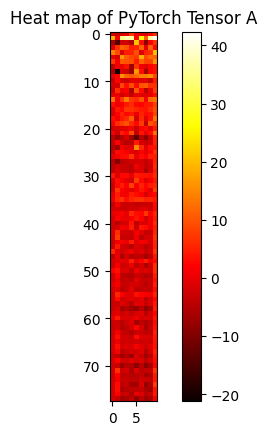

In [18]:
plt.imshow(A1[:100,:], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat map of PyTorch Tensor A')
plt.show()

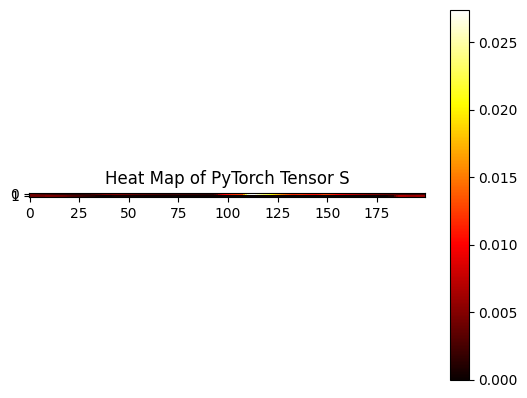

In [10]:
plt.imshow(B1[:,300:500], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [19]:
def NNMF(dataset,layers,day,mouse,timeframes):
    trainS = np.array(dataset)

    layers.insert(0,trainS.shape[0]*timeframes)

    trainData = []
    for i in range(trainS.shape[1]-timeframes+1):
        segment = trainS[:,i:i+timeframes]
        flatt = segment.flatten(order='F')
        trainData.append(flatt)
    trainMatrix = np.array(trainData).T

    train__ = torch.tensor(trainMatrix)
    net = Neural_NMF(layers)
    history = train(net, train__, epoch=10, lr=500, supervised=False)

    A = history[0][len(layers)-2]
    S = history[1][len(layers)-2]
    A1 = history[0][0].detach().numpy()
    Afinal = A.detach().numpy()
    S1 = S.detach().numpy()

    # count_ones = np.count_nonzero(opto == 1)
    # indices = np.where(opto == 1)[1]
    # slices = []
    # for idx in indices:
    #     if idx + 20 <= S1.shape[1]:
    #         slices.append(S1[:, idx:idx+20])
    #     else:
    #         slices.append(S1[:, idx:])
    # C = np.hstack(slices) if slices else np.array([])

    # if(len(layers)>2):
    #     a1 = history[0][0]
    #     a2 = history[0][1]
    #     a1a2 = torch.matmul(a1,a2)
    #     a12_ = a1a2[:,0]
    #     o,p,n = a12_[:trainS.shape[0]],a12_[trainS.shape[0]:trainS.shape[0]*2],a12_[trainS.shape[0]*2:trainS.shape[0]*3]
    #     o,p,n = o.reshape(-1,1),p.reshape(-1,1),n.reshape(-1,1)
    #     result_matrix = torch.cat((o, p, n), dim=1)

    #     plt.imshow(result_matrix.detach().numpy(), cmap='hot', interpolation='nearest')
    #     plt.colorbar()  # Show color scale
    #     plt.title('Heat Map of PyTorch Tensor A1*A2')
    #     plt.show()

    plt.imshow(A1[:100,:], cmap='hot', interpolation='nearest')
    plt.title(r'Heat map of $W^{(1)}$, ' f'Mouse {mouse} for Day {day+1} ')
    plt.show()

    plt.imshow(Afinal[:,:], cmap='hot', interpolation='nearest')
    plt.colorbar()  # Show color scale
    plt.title(r'Heat map of $W^{(2)}$, ' f'Mouse {mouse} for Day {day+1} ')
    plt.show()

    # plt.imshow(C[:,:100], cmap='hot', interpolation='nearest')
    # plt.colorbar()  # Show color scale
    # plt.title(f'Heat Map of S matrix for Mouse {mouse} for Day {day+1} with timeframes = {timeframes}')
    # plt.show()

    #activations of neurons
    
    number = trainS.shape[0]
    y = np.arange(1, number+1)
    # Create the horizontal stacked bar graph
    fig, ax = plt.subplots(figsize=(10, number*0.1))  # Adjust the size to fit the labels better
    bar_height = 0.35
    index = np.arange(number)
    # Plot the bars
    bar1 = ax.barh(index, A1[:number, 0], bar_height, label='Column 1')
    bar2 = ax.barh(index, A1[:number, 1], bar_height, left=A1[:number, 0], label='Column 2')
    # Adding labels and title
    ax.set_ylabel('Neurons')
    ax.set_xlabel('Activation Value')
    ax.set_title(f'Activation of Each Neuron in $W^{(1)}$ matrix for Mouse {mouse} for Day {day+1} with timeframes = {timeframes}')
    ax.set_yticklabels([])
    ax.legend()
    plt.show()

    number = layers[1]
    y = np.arange(1, number+1)
    # Create the horizontal stacked bar graph
    fig, ax = plt.subplots(figsize=(5, number*0.1))  # Adjust the size to fit the labels better
    bar_height = 0.35
    index = np.arange(number)
    # Plot the bars
    bar1 = ax.barh(index, Afinal[:number, 0], bar_height, label='Column 1')
    bar2 = ax.barh(index, Afinal[:number, 1], bar_height, left=Afinal[:number, 0], label='Column 2')
    # Adding labels and title
    ax.set_ylabel('Neurons')
    ax.set_xlabel('Activation Value')
    ax.set_title(f'Activation of Each Neuron in $W^{(2)}$ matrix for Mouse {mouse} for Day {day+1} with timeframes = {timeframes}')
    ax.set_yticklabels([])
    ax.legend()
    plt.show()
    return history,Afinal,S1,C,ax,fig

In [20]:
def program():
    
    for day in range(1):
        layers = [10,2]
        history,Afinal,S1,C,ax,fig = NNMF(tensor,layers,day,1,1)
    return history

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:45<00:00,  4.60s/it]


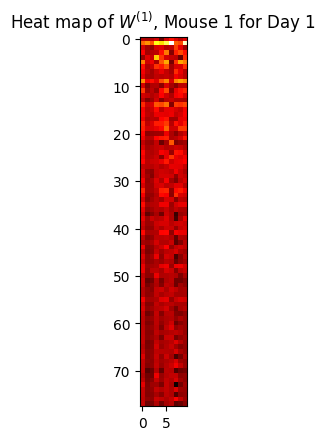

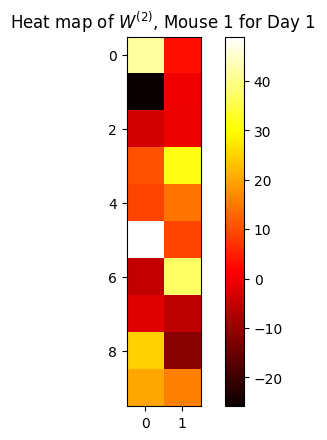

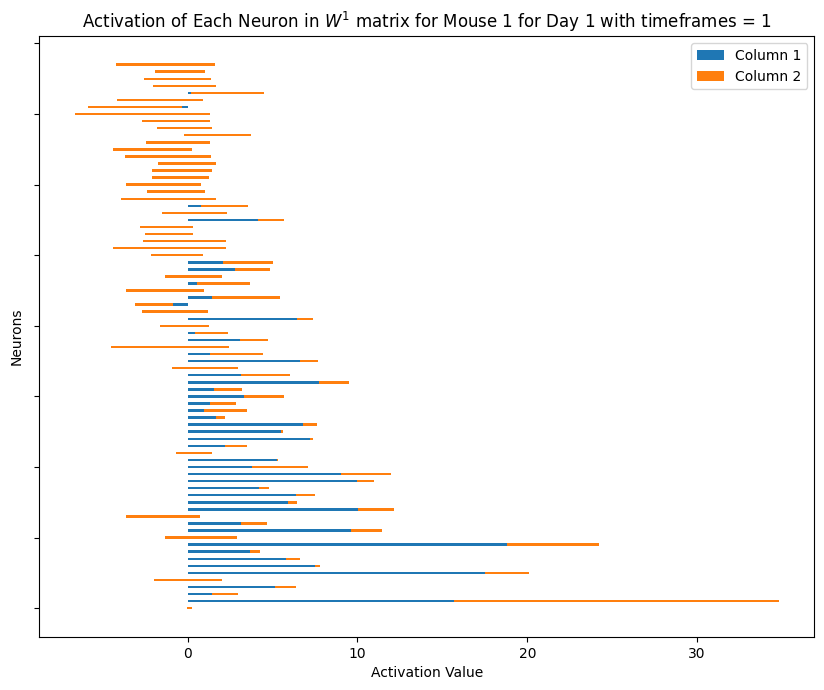

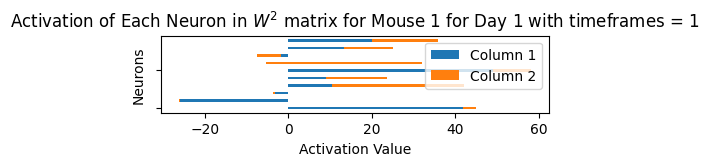

In [21]:
history = program()

In [22]:
S = history[1][1]

In [23]:
A2 = history[0][1]
A2.shape

torch.Size([10, 2])

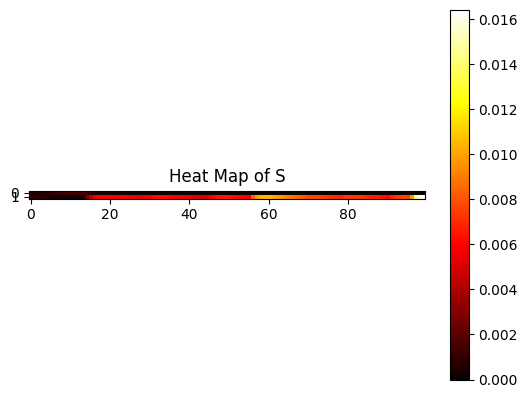

In [24]:
plt.imshow(S.detach().numpy()[:,0:100], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title(f'Heat Map of S')
plt.show()


In [25]:
sums = torch.sum(A2@S,dim = 0)
sums.shape

torch.Size([5959])

In [26]:
sed = sums.detach().numpy().reshape(1,-1)
sed.shape

(1, 5959)

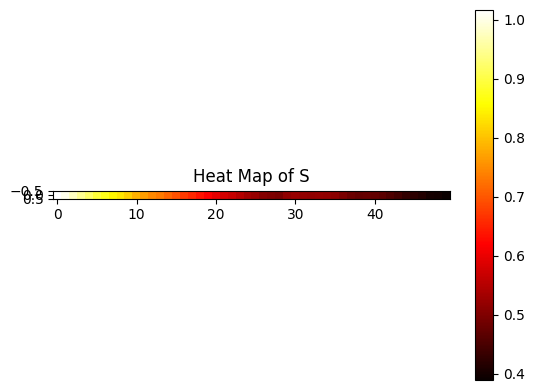

In [27]:
plt.imshow(sed[:,150:200], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title(f'Heat Map of S')
plt.show()


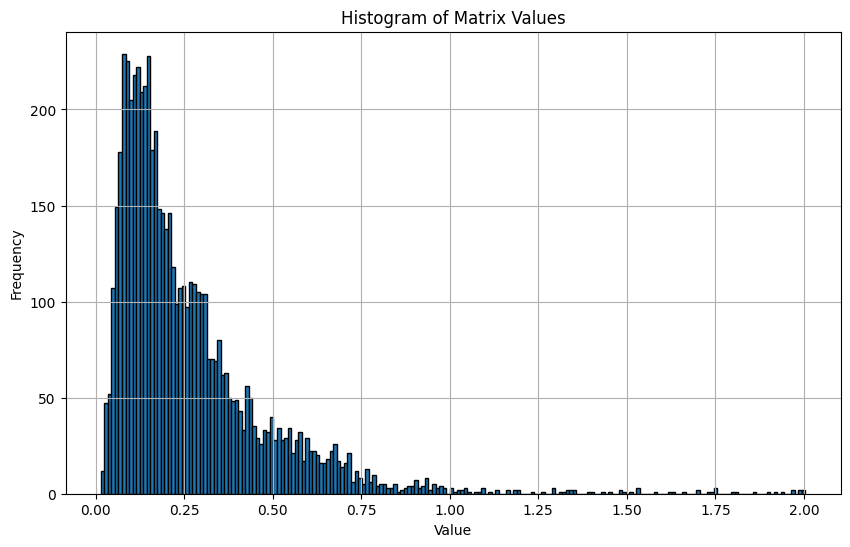

In [28]:
matrix_flat = sed.flatten()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(matrix_flat, bins=200, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Values')
plt.grid(True)

# Display the plot
plt.show()

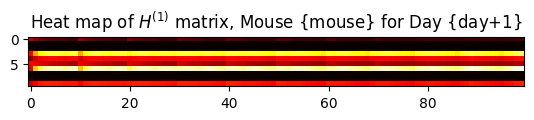

In [29]:
columns_above_threshold = torch.nonzero(torch.tensor(sed) > 0.3, as_tuple=True)[1]
S2 = (A2@S).detach().numpy()
S2[S2 < 0] = 0
slices = []
for idx in columns_above_threshold:
    if idx + 20 <= S2.shape[1]:
        slices.append(S2[:, idx:idx+10])
    else:
        slices.append(S2[:, idx:])
C = np.hstack(slices) if slices else np.array([])

plt.imshow(C[:,0:100], cmap='hot', interpolation='nearest')
plt.title(r'Heat map of $H^{(1)}$ ' 'matrix, Mouse {mouse} for Day {day+1}')
plt.show()

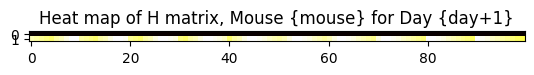

: 

In [31]:
S1 = S.detach().numpy()
S1[S1 < 0] = 0
slices = []
for idx in columns_above_threshold:
    if idx + 20 <= S1.shape[1]:
        slices.append(S1[:, idx:idx+10])
    else:
        slices.append(S1[:, idx:])
C = np.hstack(slices) if slices else np.array([])

plt.imshow(C[:,100:200], cmap='hot', interpolation='nearest')
plt.title('Heat map of H matrix, Mouse {mouse} for Day {day+1}')
plt.show()